In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [13]:
df =   pd.read_csv('churn_telecom.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df['Partner'] = pd.factorize(df['Partner'])[0]
df['Dependents'] = pd.factorize(df['Dependents'])[0]
df['PhoneService'] = pd.factorize(df['PhoneService'])[0]
df['MultipleLines'] = pd.factorize(df['MultipleLines'])[0]
df['InternetService'] = pd.factorize(df['InternetService'])[0]
df['OnlineSecurity'] = pd.factorize(df['OnlineSecurity'])[0]
df['OnlineBackup'] = pd.factorize(df['OnlineBackup'])[0]
df['DeviceProtection'] = pd.factorize(df['DeviceProtection'])[0]
df['TechSupport'] = pd.factorize(df['TechSupport'])[0]
df['StreamingTV'] = pd.factorize(df['StreamingTV'])[0]
df['StreamingMovies'] = pd.factorize(df['StreamingMovies'])[0]
df['Contract'] = pd.factorize(df['Contract'])[0]
df['PaperlessBilling'] = pd.factorize(df['PaperlessBilling'])[0]
df['PaymentMethod'] = pd.factorize(df['PaymentMethod'])[0]


In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,Yes
1,5575-GNVDE,Male,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.5,No
2,3668-QPYBK,Male,0,1,0,2,1,1,1,1,...,0,0,0,0,0,0,1,53.85,108.15,Yes
3,7795-CFOCW,Male,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,No
4,9237-HQITU,Female,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,Yes


In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  
 17  

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df['Churn'] = df['Churn'].apply(lambda x: 0 if x == 'Yes' else 1)
df['Churn'].value_counts()

Churn
1    4822
0    2210
Name: count, dtype: int64

In [19]:
# 0 = resilié    1 = non resilié

In [20]:
df[['Churn','SeniorCitizen']].value_counts()

Churn  SeniorCitizen
1      0                4189
0      0                1701
1      1                 633
0      1                 509
Name: count, dtype: int64

In [21]:
df[['Churn','gender']].value_counts() #tentative de voir si le genre a un impact sur le churn

Churn  gender
1      Male      2441
       Female    2381
0      Male      1108
       Female    1102
Name: count, dtype: int64

In [22]:
df[['Churn','Partner']].value_counts() #tentative de voir si le fait d'être partenaire a un impact sur le churn

Churn  Partner
1      0          2651
       1          2171
0      1          1468
       0           742
Name: count, dtype: int64

In [23]:
df[['Churn','MonthlyCharges']].value_counts() #tentative de trouver une corrélation

Churn  MonthlyCharges
1      20.05             52
       19.90             38
       19.70             37
       19.95             36
       19.80             34
                         ..
       30.35              1
       30.25              1
       30.05              1
       29.50              1
       118.75             1
Name: count, Length: 2412, dtype: int64

In [24]:
tauxchurn = df['Churn'].value_counts()[0]/df['customerID'].value_counts().sum() * 100 #calcul du taux de churn
tauxchurn
print(f"Le taux de churn est de {tauxchurn:.2f}%")

Le taux de churn est de 31.43%


<Axes: xlabel='Churn'>

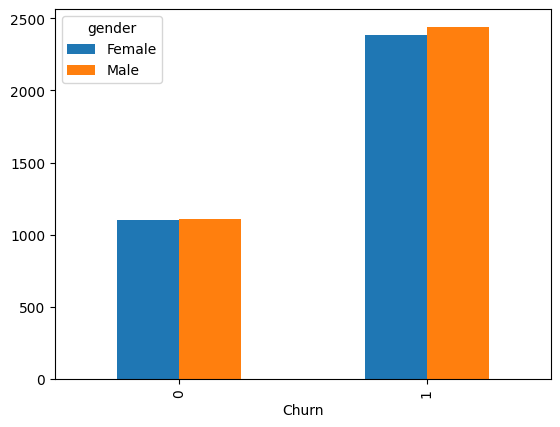

In [25]:
dfgender = df[['Churn', 'gender']].value_counts() #compte le nombre de femmes et d'hommes qui ont quitté ou non

dfgender = dfgender.unstack() #sert à pivoter les données
dfgender.plot(kind='bar', stacked=False,) #affiche les données sous forme de barres

Text(0, 0.5, 'Ancienneté en mois')

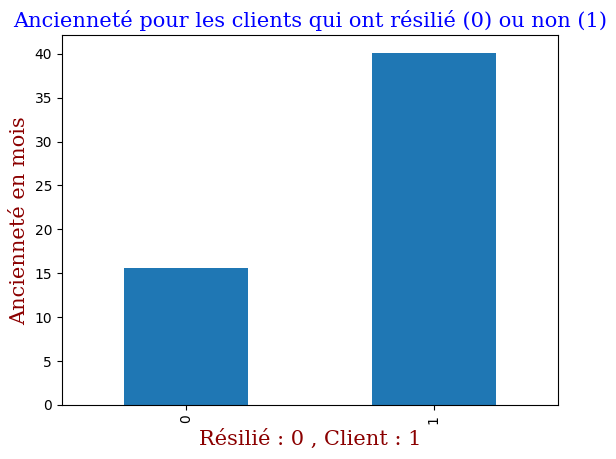

In [26]:
dfmoyennecharge = df.groupby('Churn')['tenure'].mean() #moyenne des charges mensuelles pour les clients qui ont quitté ou non
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
dfmoyennecharge.plot(kind='bar', stacked=False,)
plt.title('Ancienneté pour les clients qui ont résilié (0) ou non (1)', fontdict = font1)
plt.xlabel('Résilié : 0 , Client : 1', fontdict = font2)
plt.ylabel('Ancienneté en mois', fontdict = font2)

Text(0, 0.5, 'Monthly Charges')

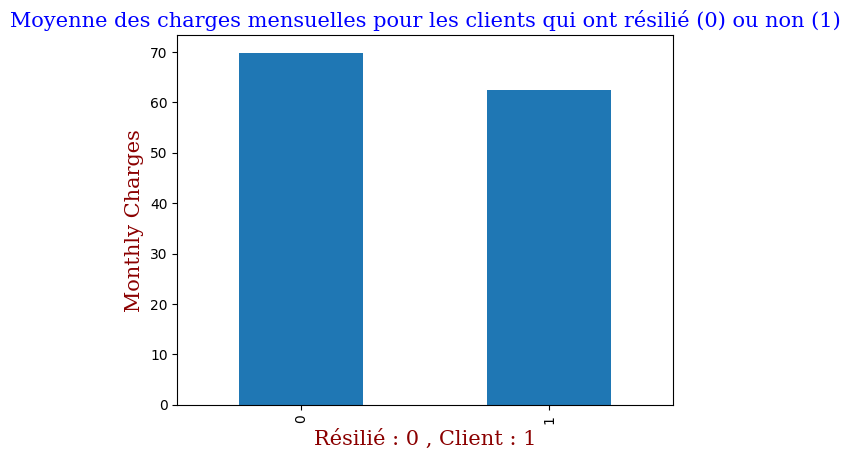

In [27]:
dfmoyennecharge = df.groupby('Churn')['MonthlyCharges'].mean() #moyenne des charges mensuelles pour les clients qui ont quitté ou non
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
dfmoyennecharge.plot(kind='bar', stacked=False,)
plt.title('Moyenne des charges mensuelles pour les clients qui ont résilié (0) ou non (1)', fontdict = font1)
plt.xlabel('Résilié : 0 , Client : 1', fontdict = font2)
plt.ylabel('Monthly Charges', fontdict = font2)

<Axes: >

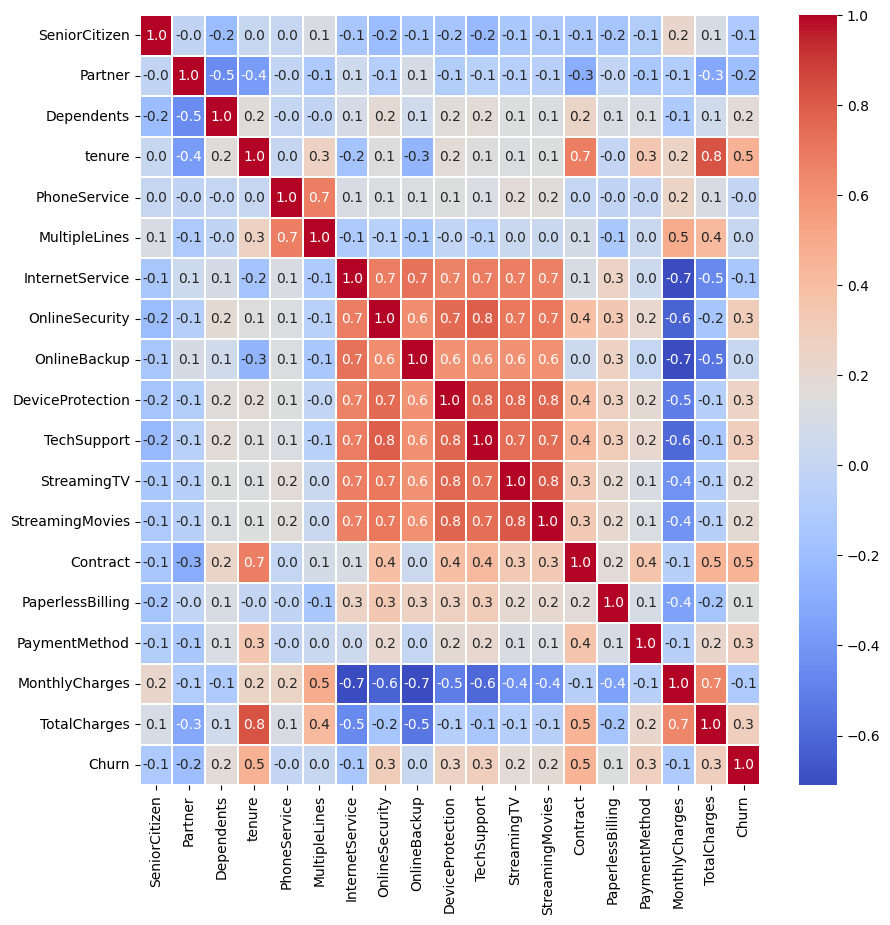

In [28]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.2, fmt='.1f')


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
modelKM = KMeans(n_clusters=2, random_state=3)
scaler = StandardScaler()
X = scaler.fit_transform(numeric_df)
modelKM.fit(X)
df['cluster'] = modelKM.labels_
silhouette_score(X, modelKM.labels_)

print(modelKM.cluster_centers_)
print(modelKM.labels_)
print(modelKM.inertia_)

[[-3.47569828e-01  5.43713438e-04  2.63520986e-01 -7.14658437e-02
   3.27189390e-01 -1.58034523e-01  1.61834463e+00  1.60846754e+00
   1.52968140e+00  1.57206759e+00  1.60599094e+00  1.55106527e+00
   1.54922738e+00  4.60025895e-01  6.10500218e-01  2.24567248e-01
  -1.45333618e+00 -7.13876663e-01  3.26946558e-01]
 [ 9.58465418e-02 -1.49935491e-04 -7.26690672e-02  1.97075621e-02
  -9.02263919e-02  4.35799119e-02 -4.46277910e-01 -4.43554185e-01
  -4.21827963e-01 -4.33516463e-01 -4.42871231e-01 -4.27724821e-01
  -4.27218001e-01 -1.26857649e-01 -1.68352745e-01 -6.19271077e-02
   4.00774854e-01  1.96860038e-01 -9.01594282e-02]]
[1 1 1 ... 1 1 1]
92704.37989972622


In [37]:
from sklearn.metrics import silhouette_score
for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=3)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    print(f"Silhouette score for {i} clusters: {score}")


Silhouette score for 2 clusters: 0.33623661307531055
Silhouette score for 3 clusters: 0.2565273017722517
Silhouette score for 4 clusters: 0.2759125181885068
Silhouette score for 5 clusters: 0.251474196496377
Silhouette score for 6 clusters: 0.22965301851708442
Silhouette score for 7 clusters: 0.2174844804806672
Silhouette score for 8 clusters: 0.22287948341658373
Silhouette score for 9 clusters: 0.17603036310790432
Silhouette score for 10 clusters: 0.17587257925222177


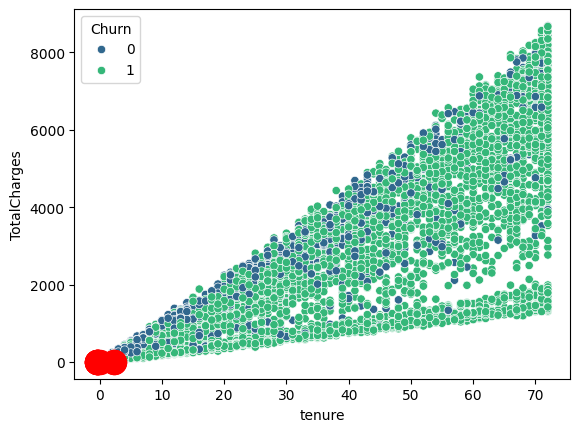

In [36]:
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', palette='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')  

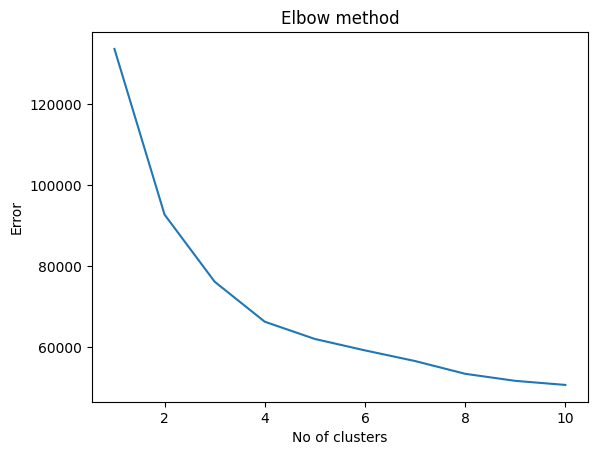

In [38]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error);
plt.title('Elbow method');
plt.xlabel('No of clusters');
plt.ylabel('Error');
plt.show();